In [1]:
## Import required Python modules
%matplotlib inline
import matplotlib.pyplot as plt
import scipy.stats
#from IPython.core.display import display
from IPython.display import display, HTML

## Customising the font size of figures
plt.rcParams.update({'font.size': 14})

<div class="container-fluid">
    <div class="row">
        <div class="col-md-8" align="center">
            <h1>PHYS 10792: Introduction to Data Science</h1>
            <!--<h3>2019-2020 Academic Year</h3><br>-->
        </div>
        <div class="col-md-3">
            <img align='center' style="border-width:0" src="images/UoM_logo.png"/>
        </div>
    </div>
</div>

<div class="container-fluid">
    <div class="row">
        <div class="col-md-2" align="right">
            <b>Course instructors:&nbsp;&nbsp;</b>
        </div>
        <div class="col-md-9" align="left">
            <a href="http://www.ajmarkwick.net/">Dr. Andrew Markwick</a> - Twitter <a href="https://twitter.com/AndrewMarkwick">@AndrewMarkwick</a><br>
            <a href="www.oms-lab.org">Dr. Patrick Parkinson</a>
        </div>
    </div>
</div>

## Problem Sheet 9

### Problem 1: Probabilities

#### Problem 1.1

In a lab experiment 300 students measure the weight of the same object. On average, they measure a weight of 1 kg. The variance of their measurements is $10^{-4}$ kg $^2$ . 
- What is the error on the mean derived from the results of all students?
- The measurement uncertainty of the scales used by the students is stated as 5 g. What do you conclude from this?
- The lowest value measured by any of the students is 968 g. Does this agree with your expectations from the cohort of measurements?

#### Problem 1.2

An experiment to count muons reaching the earth's surface from cosmic rays is conducted by 120 students. The average expected count rate is 1 per cm $^2$ and per minute. The students start their experiment at 15:20 on a Friday and end the count at 10:00 on the following Monday. Their detectors have a survace area of 0.5 cm by 5.0 cm.
- What average count and sample standard deviation do you expect?
- How many of the students would you expect to have a count of 200 or more above the average?

### Solution to Problem 1

#### Solution 1.1

- The error on the mean is the sample standard deviation divided by the square-root of the number of elements in the sample. The sample standard deviation is the square-root of the variance, hence the error is: $\sigma=\sqrt{V}/\sqrt{N}=10^{-2}~{\rm kg}/\sqrt{300}=0.577~{\rm g}$.
- The sample standard deviation, which is $10~{\rm g}$ according to the previous answer, should correspond to the uncertainty of individual measurements. The fact that the uncertainty is stated as being half of that value indicates that the stated uncertainty is too small.
- Assuming a Gaussian distribution, we can expect $99.7\%$ to lie within $\pm3\sigma$ of the distribution, which corresponds to 299 of the 300 measurements giving results in the range $[970~{\rm g},1030~{\rm g}]$. While we do not know the distribution of results greater than the mean, having the lowest result just outside the $3\sigma$ range seems credible.

#### Solution 1.2

- 4000 minutes and 2.5 cm$^2$ mean the expected count is 10,000. The standard deviation is therefore $\sigma=\sqrt{N}=100$.
- A count of 200 above the mean corresponds to 2 standard deviations. We would expect $5\%$ to lie outside two standard deviations either below or above the mean, so $2.5\%$ should have a count of 200 or more above the average. This corresponds to 3 students.

### Problem 2: Confidence belts

#### Problem 2.1
Produce a $95\%$ central interval confidence belt for a Gaussian distribution describing the mass measurement from a set of scales with a dish in which the objects to be measured are placed. Assume that the measured value includes the mass of the dish of 20 g (known exactly) with the true value corresponding to the mass of the content of the dish. Assume further that the measurement uncertainty has a constant component of 1 g and a variable component of $0.05\times m$, where $m$ is the true mass (these components add linearly).
- Sketch the corresponding confidence belt.
- Determine the $95\%$ intervals for the true mass based on assumed measured masses of 27 g and 54 g.

### Solution to Problem 2

#### Solution 2.1

- The horizontal interval boundaries for a true value of $y$ are given by $x_\pm=d+y\pm{}s(c+my)$, for the dish weight, $d=20~{\rm g}$, the Gaussian scale factor, $s=1.96$, the constant error component, $c=1~{\rm g}$, and the variable error component factor, $m=0.05$.

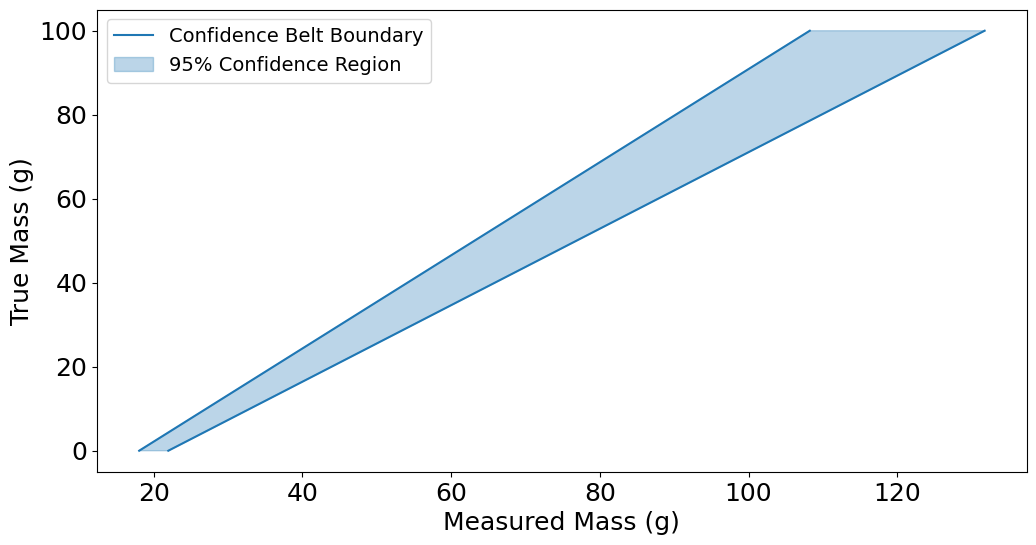

In [3]:
from typing import Tuple
import matplotlib.pyplot as plt

# Statistical parameters for confidence belt calculation
detector_offset: float = 20.0    # Systematic offset in measurement (g)
constant_error: float = 1.0      # Base uncertainty in measurement (g)
mass_dep_error: float = 0.05     # Mass-dependent uncertainty (fraction)
sigma_level: float = 1.96        # Number of sigma for 95% confidence level

# Range of true mass values to consider (g)
mass_true_min: float = 0.0
mass_true_max: float = 100.0

# Calculate confidence belt boundaries
# Upper boundary: measured = true + offset + sigma * uncertainty
# Lower boundary: measured = true + offset - sigma * uncertainty
# where uncertainty = constant_error + mass_dependent_error * true_mass
def calc_boundaries(mass_true: float) -> Tuple[float, float]:
    uncertainty = constant_error + mass_dep_error * mass_true
    measured_upper = detector_offset + mass_true + sigma_level * uncertainty
    measured_lower = detector_offset + mass_true - sigma_level * uncertainty
    return measured_lower, measured_upper

# Calculate boundary points
lower_start, upper_start = calc_boundaries(mass_true_min)
lower_end, upper_end = calc_boundaries(mass_true_max)

# Create confidence belt plot
fig, ax = plt.subplots(figsize=(12, 6))

# Plot boundaries and fill confidence region
ax.plot([upper_start, upper_end], [mass_true_min, mass_true_max], 
        '-', label='Confidence Belt Boundary', color='tab:blue')
ax.plot([lower_start, lower_end], [mass_true_min, mass_true_max], 
        '-', color='tab:blue')
ax.fill([lower_start, upper_start, upper_end, lower_end],
        [mass_true_min, mass_true_min, mass_true_max, mass_true_max], 
        color='tab:blue', alpha=0.3,
        label='95% Confidence Region')

# Label axes with clear units
ax.set_xlabel('Measured Mass (g)', fontsize=18)
ax.set_ylabel('True Mass (g)', fontsize=18)
ax.tick_params(axis='both', which='major', labelsize=18)
ax.legend(fontsize=14)

- Solving the above equations for $y$ gives the true intervals, and for a measurement of $27~{\rm g}$ the range is $4.6$ to $9.9~{\rm g}$, for a measurement of $54~{\rm g}$ the range is $29.2$ to $39.9~{\rm g}$.

For a measurement of 27.0g, the true mass range is 4.6g to 9.9g
For a measurement of 54.0g, the true mass range is 29.2g to 39.9g


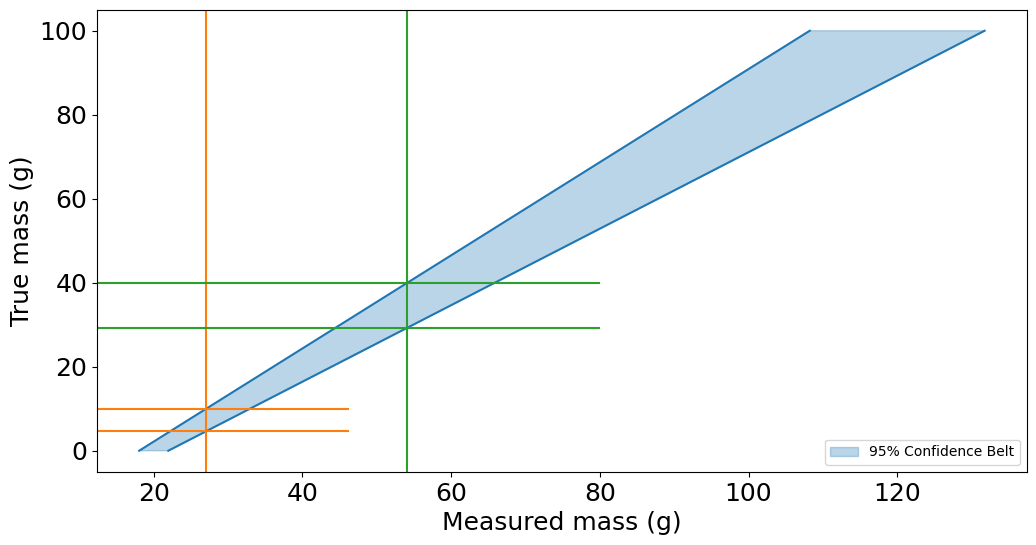

In [4]:
from typing import Tuple
import matplotlib.pyplot as plt

def calculate_confidence_bounds(
    detector_offset: float,
    constant_uncertainty: float,
    proportional_uncertainty: float,
    confidence_sigma: float,
    true_mass_range: Tuple[float, float]
) -> Tuple[float, float, float, float]:
    """Calculate the upper and lower confidence belt boundaries."""
    y_min, y_max = true_mass_range
    
    # Upper boundary points (x1, x2)
    upper_left = detector_offset + y_min + confidence_sigma * (constant_uncertainty + proportional_uncertainty * y_min)
    upper_right = detector_offset + y_max + confidence_sigma * (constant_uncertainty + proportional_uncertainty * y_max)
    
    # Lower boundary points (x3, x4)
    lower_left = detector_offset + y_min - confidence_sigma * (constant_uncertainty + proportional_uncertainty * y_min)
    lower_right = detector_offset + y_max - confidence_sigma * (constant_uncertainty + proportional_uncertainty * y_max)
    
    return upper_left, upper_right, lower_left, lower_right

def calculate_true_mass_range(
    measured_mass: float,
    detector_offset: float,
    constant_uncertainty: float,
    proportional_uncertainty: float,
    confidence_sigma: float
) -> Tuple[float, float]:
    """Calculate the range of possible true masses for a measured value."""
    # Inverting the measurement equation to solve for true mass (y)
    # Original: x = d + y + s*(c + m*y)
    # Solved for y: y = (x - d ∓ s*c)/(1 ± s*m)
    true_mass_min = (measured_mass - detector_offset - confidence_sigma * constant_uncertainty) / (1 + confidence_sigma * proportional_uncertainty)
    true_mass_max = (measured_mass - detector_offset + confidence_sigma * constant_uncertainty) / (1 - confidence_sigma * proportional_uncertainty)
    
    return true_mass_min, true_mass_max

# Detector and measurement parameters
detector_offset = 20.0  # Systematic offset in detector response
constant_uncertainty = 1.0  # Constant term in uncertainty
proportional_uncertainty = 0.05  # Proportional term in uncertainty
confidence_sigma = 1.96  # Number of sigma for 95% confidence level
true_mass_range = (0, 100)  # Range of true masses to consider

# Calculate confidence belt boundaries
belt_bounds = calculate_confidence_bounds(
    detector_offset, constant_uncertainty, proportional_uncertainty,
    confidence_sigma, true_mass_range
)

# Example measurements
measurement_1 = 27.0
measurement_2 = 54.0

# Calculate true mass ranges for measurements
true_range_1 = calculate_true_mass_range(
    measurement_1, detector_offset, constant_uncertainty,
    proportional_uncertainty, confidence_sigma
)
true_range_2 = calculate_true_mass_range(
    measurement_2, detector_offset, constant_uncertainty,
    proportional_uncertainty, confidence_sigma
)

# Print results
print(f'For a measurement of {measurement_1}g, the true mass range is {true_range_1[0]:.1f}g to {true_range_1[1]:.1f}g')
print(f'For a measurement of {measurement_2}g, the true mass range is {true_range_2[0]:.1f}g to {true_range_2[1]:.1f}g')

# Plotting
fig, ax = plt.subplots(figsize=(12, 6))

# Plot confidence belt
ax.plot([belt_bounds[0], belt_bounds[1]], true_mass_range, '-', color='tab:blue')
ax.plot([belt_bounds[2], belt_bounds[3]], true_mass_range, '-', color='tab:blue')
ax.fill([belt_bounds[2], belt_bounds[0], belt_bounds[1], belt_bounds[3]], 
        [true_mass_range[0]]*2 + [true_mass_range[1]]*2, 
        color='tab:blue', alpha=0.3, label='95% Confidence Belt')

# Plot measurements and their true mass ranges
for measurement, true_range, color in [
    (measurement_1, true_range_1, 'tab:orange'),
    (measurement_2, true_range_2, 'tab:green')
]:
    ax.axvline(x=measurement, color=color, ymin=0, ymax=1)
    ax.axhline(y=true_range[0], color=color, xmin=0, xmax=measurement/100)
    ax.axhline(y=true_range[1], color=color, xmin=0, xmax=measurement/100)

ax.set_xlabel('Measured mass (g)', fontsize=18)
ax.set_ylabel('True mass (g)', fontsize=18)
ax.tick_params(axis='both', which='major', labelsize=18)
plt.legend()
plt.show()


<div class="well" align="center">
    <div class="container-fluid">
        <div class="row">
            <div class="col-md-3" align="center">
                <img align="center" alt="Creative Commons License" style="border-width:0" src="https://licensebuttons.net/l/by-nc-sa/4.0/88x31.png" width="60%">
            </div>
            <div class="col-md-8">
            This work is licensed under a <a href="http://creativecommons.org/licenses/by-nc-sa/4.0/">Creative Commons Attribution-NonCommercial-ShareAlike 4.0 International License</a>).
            </div>
        </div>
    </div>
    <br>
    <br>
    <i>Note: The content of this Jupyter Notebook is provided for educational purposes only.</i>
</div>